<a href="https://colab.research.google.com/github/CJisombard/hands-on-sql-3086685/blob/main/Filipino_Fake_News_Detection_RFC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Sample Code Using Natural Language Processing Techniques and Random Forest Classifier | Fake News Detection in Filipino Language
from google.colab import files
files.upload()

Saving full.csv to full (1).csv


{'full (1).csv': b'label,article\n0,"Ayon sa TheWrap.com, naghain ng kaso si Krupa, 35, noong Huwebes dahil nakaranas umano siya ng emotional distress bunga ng mga malisyosong pahayag ni Glanville, hindi lamang tungkol sa maselang bahagi ng kanyang katawan kundi pati na rin sa kanyang buhay pag-ibig. Noong Nobyembre 2013, napanood si Brandi sa Watch What Happens Live at sinabing kinausap umano ito ng dating karelasyon ni Joanna. Si Mohamed Hadid, na noon ay kasal sa cast member ng Real Housewives of Beverly Hills na si Yolanda Foster habang nasa relasyon, ang nagsabing ang kanyang ""p--sy smelled."" (Classy pa rin naman ang pagkakabanggit dito ni Brandi.) Noong Disyembre, gumawa ng mga panibagong komento si Glanville, 42, sa kanyang pagharap sa YouTube at sinabing, ""You can\'t help the odor situation."" Makalipas ang ilang linggo, nagpadala ng sulat ang mga abogado ni Krupa kay Brandi tungkol sa kanilang planong pagsampa ng kaso. Nakalakip sa sulat ng abogado ni Joanna na, ""You knew 

In [ ]:
import numpy as np
import pandas as pd
import nltk
import string

In [ ]:
#declare data pointing towards dataset
data = pd.read_csv('full.csv')
data.head()

label                                            article
0      0  Ayon sa TheWrap.com, naghain ng kaso si Krupa,...
1      0  Kilala rin ang singer sa pagkumpas ng kanyang ...
2      0  BLANTYRE, Malawi (AP) -- Bumiyahe patungong Ma...
3      0  Kasama sa programa ang pananalangin, bulaklak ...
4      0  Linisin ang Friendship Department dahil dadala...

In [ ]:
#data overview/description #ignore suggested charts by google
data.count()

label      3206
article    3206
dtype: int64

In [ ]:
# 50- 50 ratio to avoid bias* in dataset
yaxis = data.label
print(f'Ratio of real and fake news:')
yaxis.value_counts(normalize=True).rename({1: 'real', 0: 'fake'})

Ratio of real and fake news:


fake    0.5
real    0.5
Name: label, dtype: float64

Text(0.5, 1.0, 'Distribution of Fake/Real News')

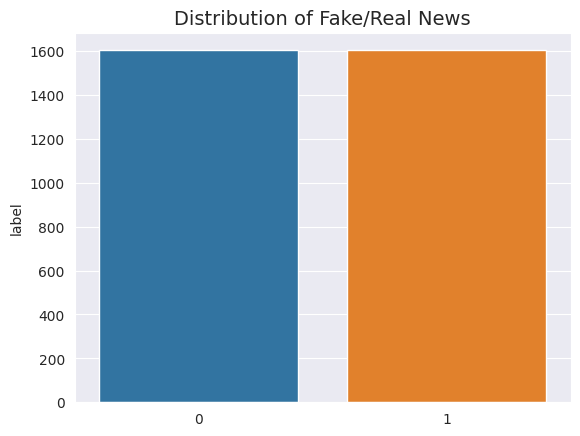

In [ ]:
class_names = ['fake', 'real']
label_count = data.label.value_counts()
sns.barplot(x=label_count.index, y=label_count)
plt.title('Distribution of Fake/Real News',fontsize =14)

In [ ]:
data.describe()

label
count  3206.000000
mean      0.500000
std       0.500078
min       0.000000
25%       0.000000
50%       0.500000
75%       1.000000
max       1.000000

In [ ]:
#Data Cleaning | Pre-processing
#remove all the punctuations and numbers replacing it with space.
data['article']=data['article'].str.replace('[^a-zA-Z]',' ')
data['article']=[word.lower() for word in data['article']]
data['article'].sample(6)

<ipython-input-63-a2a5ee564451>:3: FutureWarning: The default value of regex will change from True to False in a future version.
  data['article']=data['article'].str.replace('[^a-zA-Z]',' ')


1903    unti unting naglalabas ng mahahalagang imporma...
488      wala pong katotohanan na binayaran ng gobyern...
1404    kinumpirma noong linggo ng gabi ni player agen...
1263     actually  mag iistart din ang boxing  chess a...
2214    tila humanga ang ilang kilalang personalidad s...
594     actually  isa kami sa inalukan ng ginawang ahe...
Name: article, dtype: object

In [ ]:
#stopwords are insignificant* words that does not contribute much to the content of a text/sentence.
filstopwords = ["walang","kasama","umano","best","ibang","ilang","ani","ba","ring","parang","bahagi","u","bukod","siyang","yun","itong","akin","ma","pag","mag","upang","nag","nasabing","pahayag","s","t","noong","sinabi","will","ngunit","mas","noon","ayon","nina","matapos","nasa","rin","nang","kay","sina","pang","nga","aking","ako","alin","am","amin","aming","ang","ano","anumang","apat","at","atin","ating","ay","bababa","bago","bakit","bawat","bilang","dahil","dalawa","dapat","din","dito","doon","gagawin","gayunman","ginagawa","ginawa","ginawang","gumawa","gusto","habang","hanggang","hindi","huwag","iba","ibaba","ibabaw","ibig","ikaw","ilagay","ilalim","ilan","inyong","isa","isang","itaas","ito","iyo","iyon","iyong","ka","kahit","kailangan","kailanman","kami","kanila","kanilang","kanino","kanya","kanyang","kapag","kapwa","karamihan","katiyakan","katulad","kaya","kaysa","ko","kong","kulang","kumuha","kung","laban","lahat","lamang","likod","lima","maaari","maaaring","maging","mahusay","makita","marami","marapat","masyado","may","mayroon","mga","minsan","mismo","mula","muli","na","nabanggit","naging","nagkaroon","nais","nakita","namin","napaka","narito","nasaan","ng","ngayon","ni","nila","nilang","nito","niya","niyang","noon","o","pa","paano","pababa","paggawa","pagitan","pagkakaroon","pagkatapos","palabas","pamamagitan","panahon","pangalawa","para","paraan","pareho","pataas","pero","pumunta","pumupunta","sa","saan","sabi","sabihin","sarili","sila","sino","siya","tatlo","tayo","tulad","tungkol","una","walang""ba","eh","kasi","lang","mo","naman","opo","po","si","talaga","yung"]

In [ ]:
data['withoutstopwords'] = data['article'].apply(lambda x: ' '.join([word for word in x.split() if word not in (filstopwords)]))
data[['article','withoutstopwords']].sample(20)

article  \
1760  ayon sa social media post ng dzmm  magsusunog ...   
622   sinabi ni psc planning and research chief dr  ...   
2697  usap usapan ngayon sa social media ang umano y...   
1816  kumakalat ngayon ang ilang larawan na nagpapak...   
1682  matapos pumutok ang balita tungkol sa pambubug...   
3188  humingi ng paumanhin ang radio broadcaster na ...   
1342  my ideal age to get married before is     pero...   
2138  sapul sa video ang pagpukpok ng itlog sa ulo n...   
2636  pabahay at trabaho ang naghihintay sa mga susu...   
561   maglalaban laban sa susunod na live shows sina...   
590   ito ang nalantad kahapon sa naganap na philipp...   
2160  nitong umpisa ng linggo ay tumabad sa publiko ...   
562   ikatlong project na nina coco martin at julia ...   
1389  nagawa si saso ng bogey sa no    at no    at b...   
2345  inulan ng batikos online ang isang video na ip...   
287   isinulat at iniulat ni per liljas ng time maga...   
1179  madaling araw nang araw na iyon ay nagdasal si...   
250   pinaghahanap naman ngayon ang suspek na si dan...   
487   kamakailan din nakipag agapayan ang sp philipp...   
972   sa kanyang ulat kay senior supt  rodolfo recom...   

                                       withoutstopwords  
1760  social media post dzmm magsusunog miyembro mil...  
622   psc planning and research chief dr lauro domin...  
2697  usap usapan social media y panggagaya kinatawa...  
1816  kumakalat larawan nagpapakita pagkakaiba manil...  
1682  pumutok balita pambubugbog amang guimbal town ...  
3188  humingi paumanhin radio broadcaster erwin tulf...  
1342  my ideal age to get married before is nasunod ...  
2138  sapul video pagpukpok itlog ulo senador austra...  
2636  pabahay trabaho naghihintay susukong miyembro ...  
561   maglalaban susunod live shows alisah bonaobra ...  
590   nalantad kahapon naganap philippine olympic co...  
2160  nitong umpisa linggo tumabad publiko balita na...  
562   ikatlong project coco martin julia montes wans...  
1389  nagawa saso bogey no no birdie a no umiskor gr...  
2345  inulan batikos online video ipinost netizen so...  
287   isinulat iniulat per liljas time magazine isin...  
1179  madaling araw araw nagdasal hooper ganap umaga...  
250   pinaghahanap suspek dan rex enriquez nakatira ...  
487   kamakailan nakipag agapayan sp philippines sm ...  
972   ulat senior supt rodolfo recomono jr direktor ...

In [ ]:
#tokenization
import nltk
nltk.download('punkt')
from nltk.tokenize import WhitespaceTokenizer
data['tokenize']=data['withoutstopwords'].apply(nltk.tokenize.WhitespaceTokenizer().tokenize)
data['tokenize'].sample(10)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


10      [ipinapasuspinde, technology, resource, center...
2796    [play, full, video, below, mainit, debate, pre...
815     [nakuha, operatiba, cardona, police, suspek, d...
1534    [natagpuan, mangingisda, mahigit, p, milyon, h...
1958    [magkasabay, nasunog, building, bureau, of, cu...
876     [unang, nasakote, pulisya, y, kilabot, drug, p...
2519    [ikinatuwa, sneador, antonio, trillanes, inila...
1414    [naungkat, y, pagsuporta, ramos, ihayag, datin...
2479    [magandang, balita, tuluy, tuloy, pagbangon, m...
2298    [hinikayat, vice, president, lei, robredo, tao...
Name: tokenize, dtype: object

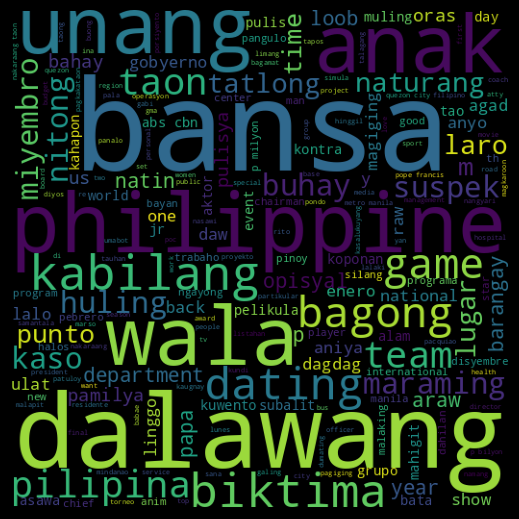

In [ ]:
#Bag of Words on Fake News
import matplotlib.pyplot as plt
from wordcloud import WordCloud
fake_cloud=''.join(data[data.label==0]['withoutstopwords'])
fake_cloud=WordCloud(width=520, height=520).generate(fake_cloud)
plt.figure(figsize=(5,5),facecolor='k')
plt.imshow(fake_cloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

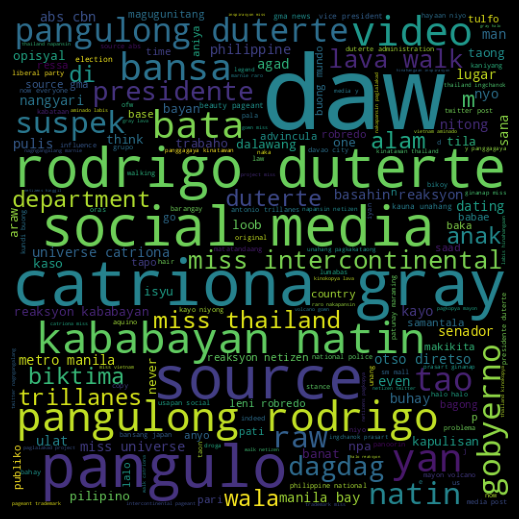

In [ ]:
#Bag of Words on Factual News
import matplotlib.pyplot as plt
from wordcloud import WordCloud
fake_cloud=''.join(data[data.label==1]['withoutstopwords'])
fake_cloud=WordCloud(width=520, height=520).generate(fake_cloud)
plt.figure(figsize=(5,5),facecolor='k')
plt.imshow(fake_cloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

In [ ]:
#converting data to array for RFC/training/splitting

from sklearn.feature_extraction.text import CountVectorizer,TfidfTransformer
cv=CountVectorizer(max_features=1000)
vect=cv.fit_transform(data.withoutstopwords).toarray()
vect

array([[0, 0, 0, ..., 3, 3, 0],
       [0, 0, 0, ..., 2, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 1, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 1, 0, 0]])

In [ ]:
tfidf_transformer=TfidfTransformer(use_idf=True)
tfidf_array=tfidf_transformer.fit_transform(vect).toarray()
tfidf_array

array([[0.        , 0.        , 0.        , ..., 0.21999005, 0.27785253,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.25809371, 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.22660471, 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.15464102, 0.        ,
        0.        ]])

In [ ]:
#initialize testing
data_x=tfidf_array
data_y=data['label']

#splitting data into train and test
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(tfidf_array,data_y,test_size=0.2,random_state=1)

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import  RandomForestClassifier
from mlxtend.plotting import plot_confusion_matrix
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score


In [ ]:
#Random Forest
rfc=RandomForestClassifier(random_state=0)
rfc.fit(xtrain,ytrain)
ypred=rfc.predict(xtest)
accuracy= round((accuracy_score(ytest,ypred)*100),2)
print("Accuracy of Random Forest is {}".format(accuracy))


Accuracy of Random Forest is 94.24


Accuracy is 94.24
confusion_matrix:


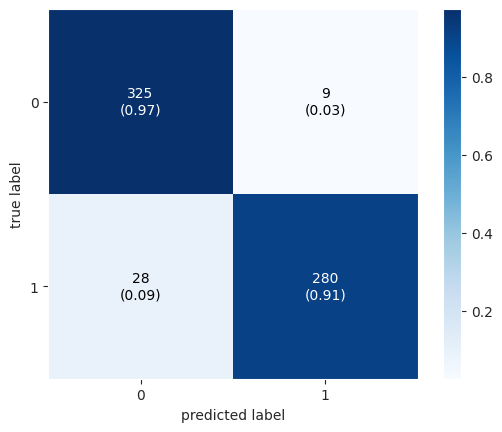


Classification Report of Random Forest Classifier:

              precision    recall  f1-score   support

           0       0.92      0.97      0.95       334
           1       0.97      0.91      0.94       308

    accuracy                           0.94       642
   macro avg       0.94      0.94      0.94       642
weighted avg       0.94      0.94      0.94       642



In [ ]:
print("Accuracy is {}".format(accuracy))
print("confusion_matrix:")
LABEL=['0','1']
conf=confusion_matrix(ytest,ypred)
fig, ax = plot_confusion_matrix(conf_mat=confusion_matrix(ytest, ypred),
                                show_absolute=True,
                                show_normed=True,
                                colorbar=True)
plt.show()
print("\nClassification Report of Random Forest Classifier:\n")
print(classification_report(ytest, ypred))